In [2]:
import os
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
path = '/Users/yuqianxie/Desktop/DS_proj_analysis/dataset'
os.chdir(path)
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/yuqianxie/Desktop/DS_proj_analysis/dataset


02:53:39 - cmdstanpy - INFO - Chain [1] start processing
02:53:39 - cmdstanpy - INFO - Chain [1] done processing


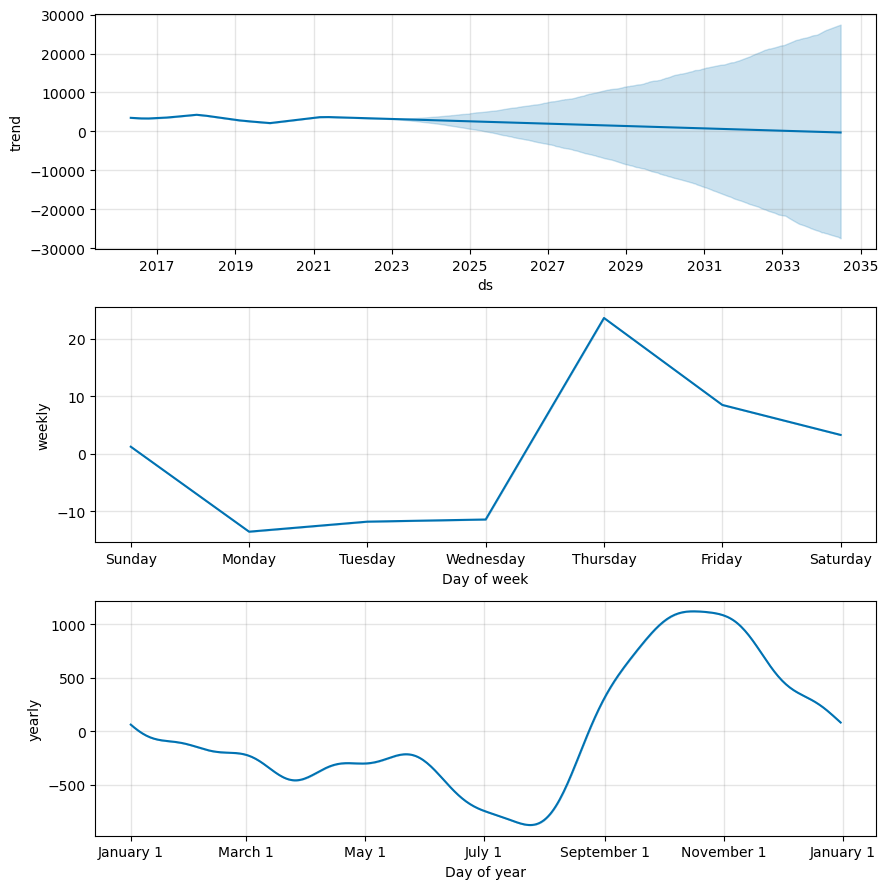

In [4]:
data = pd.read_excel('Merged_Sorted_Data_Herd_Daily.xlsx')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data = data.dropna(subset=['Date'])  
data = data.sort_values('Date')  
data = data[['Date', 'Total Amount of Milk Produced']].dropna()
data.columns = ['ds', 'y']  # Rename the columns for compatibility with Prophet
# Split data into train and test sets
train_ratio = 0.8
split_index = int(train_ratio * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]
model = Prophet()
model.fit(train_data)
future_dates = model.make_future_dataframe(periods=len(test_data) + 3650)  # Predict for the next 10 years
forecast = model.predict(future_dates)
# fig1 = model.plot(forecast)
# plt.show()
fig2 = model.plot_components(forecast)
plt.show()
forecast.to_csv('forecast_prophet_2025_2035.csv', index=False)

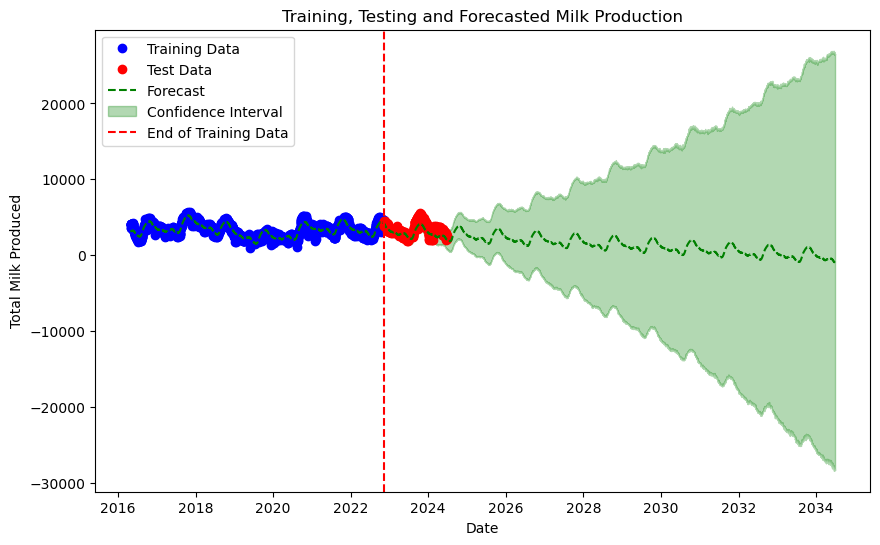

In [5]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_data['ds'], train_data['y'], label='Training Data', color='blue', marker='o', linestyle='')
ax.plot(test_data['ds'], test_data['y'], label='Test Data', color='red', marker='o', linestyle='')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green', linestyle='--')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.3, label='Confidence Interval')
last_training_date = train_data['ds'].iloc[-1]
ax.axvline(x=last_training_date, color='red', linestyle='--', label='End of Training Data')
ax.set_title('Training, Testing and Forecasted Milk Production')
ax.set_xlabel('Date')
ax.set_ylabel('Total Milk Produced')
ax.legend(loc='upper left')
plt.show()

In [ ]:
forecast_filtered = forecast[['ds', 'yhat']].set_index('ds')
test_data_filtered = test_data.set_index('ds')
results = test_data_filtered.join(forecast_filtered)
# Calculate MSE
mse = mean_squared_error(results['y'], results['yhat'])
print(f'Mean Squared Error on Test Data: {mse}')

Mean Squared Error on Test Data: 379845.7970926814
